# h3 python api

In [1]:
from h3 import h3
import folium

def visualize_hexagons(hexagons, color="red", folium_map=None):
    """
    hexagons是一个六边形集群列表，每个六边形集群是一个六边形列表。
    例如：[[hex1, hex2], [hex3, hex4]]
    """
    polylines = []
    lat = []
    lng = []
    for hex in hexagons:  # 对于每一个六边形
        polygons = h3.h3_set_to_multi_polygon([hex], geo_json=False)  # 将H3索引转换为多边形集
        # 将多边形展平为线段
        outlines = [loop for polygon in polygons for loop in polygon]  
        polyline = [outline + [outline[0]] for outline in outlines][0]  # 获取每个多边形的轮廓线
        lat.extend(map(lambda v:v[0],polyline))  # 获取所有纬度
        lng.extend(map(lambda v:v[1],polyline))  # 获取所有经度
        polylines.append(polyline)  # 将轮廓线添加到polylines列表
    
    if folium_map is None:  # 如果没有提供Folium地图对象，则创建一个新的
        m = folium.Map(location=[sum(lat)/len(lat), sum(lng)/len(lng)], zoom_start=13, tiles='cartodbpositron')
    else:  # 否则使用提供的Folium地图对象
        m = folium_map
    for polyline in polylines:  # 对于每一条轮廓线
        my_PolyLine=folium.PolyLine(locations=polyline,weight=8,color=color)  # 创建一个Folium PolyLine对象
        m.add_child(my_PolyLine)  # 将PolyLine对象添加到地图上
    return m  # 返回地图对象
    

def visualize_polygon(polyline, color):
    polyline.append(polyline[0])  # 将第一个点添加到polyline的末尾，以创建一个闭合的多边形
    lat = [p[0] for p in polyline]  # 获取所有纬度
    lng = [p[1] for p in polyline]  # 获取所有经度
    m = folium.Map(location=[sum(lat)/len(lat), sum(lng)/len(lng)], zoom_start=13, tiles='cartodbpositron')  # 创建一个Folium地图对象
    my_PolyLine=folium.PolyLine(locations=polyline,weight=8,color=color)  # 创建一个Folium PolyLine对象
    m.add_child(my_PolyLine)  # 将PolyLine对象添加到地图上
    return m  # 返回地图对象


In [2]:
h3_address = h3.geo_to_h3(37.3615593, -122.0553238, 9) # lat, lng, hex resolution                                                                                                        
m = visualize_hexagons([h3_address])
display(m)

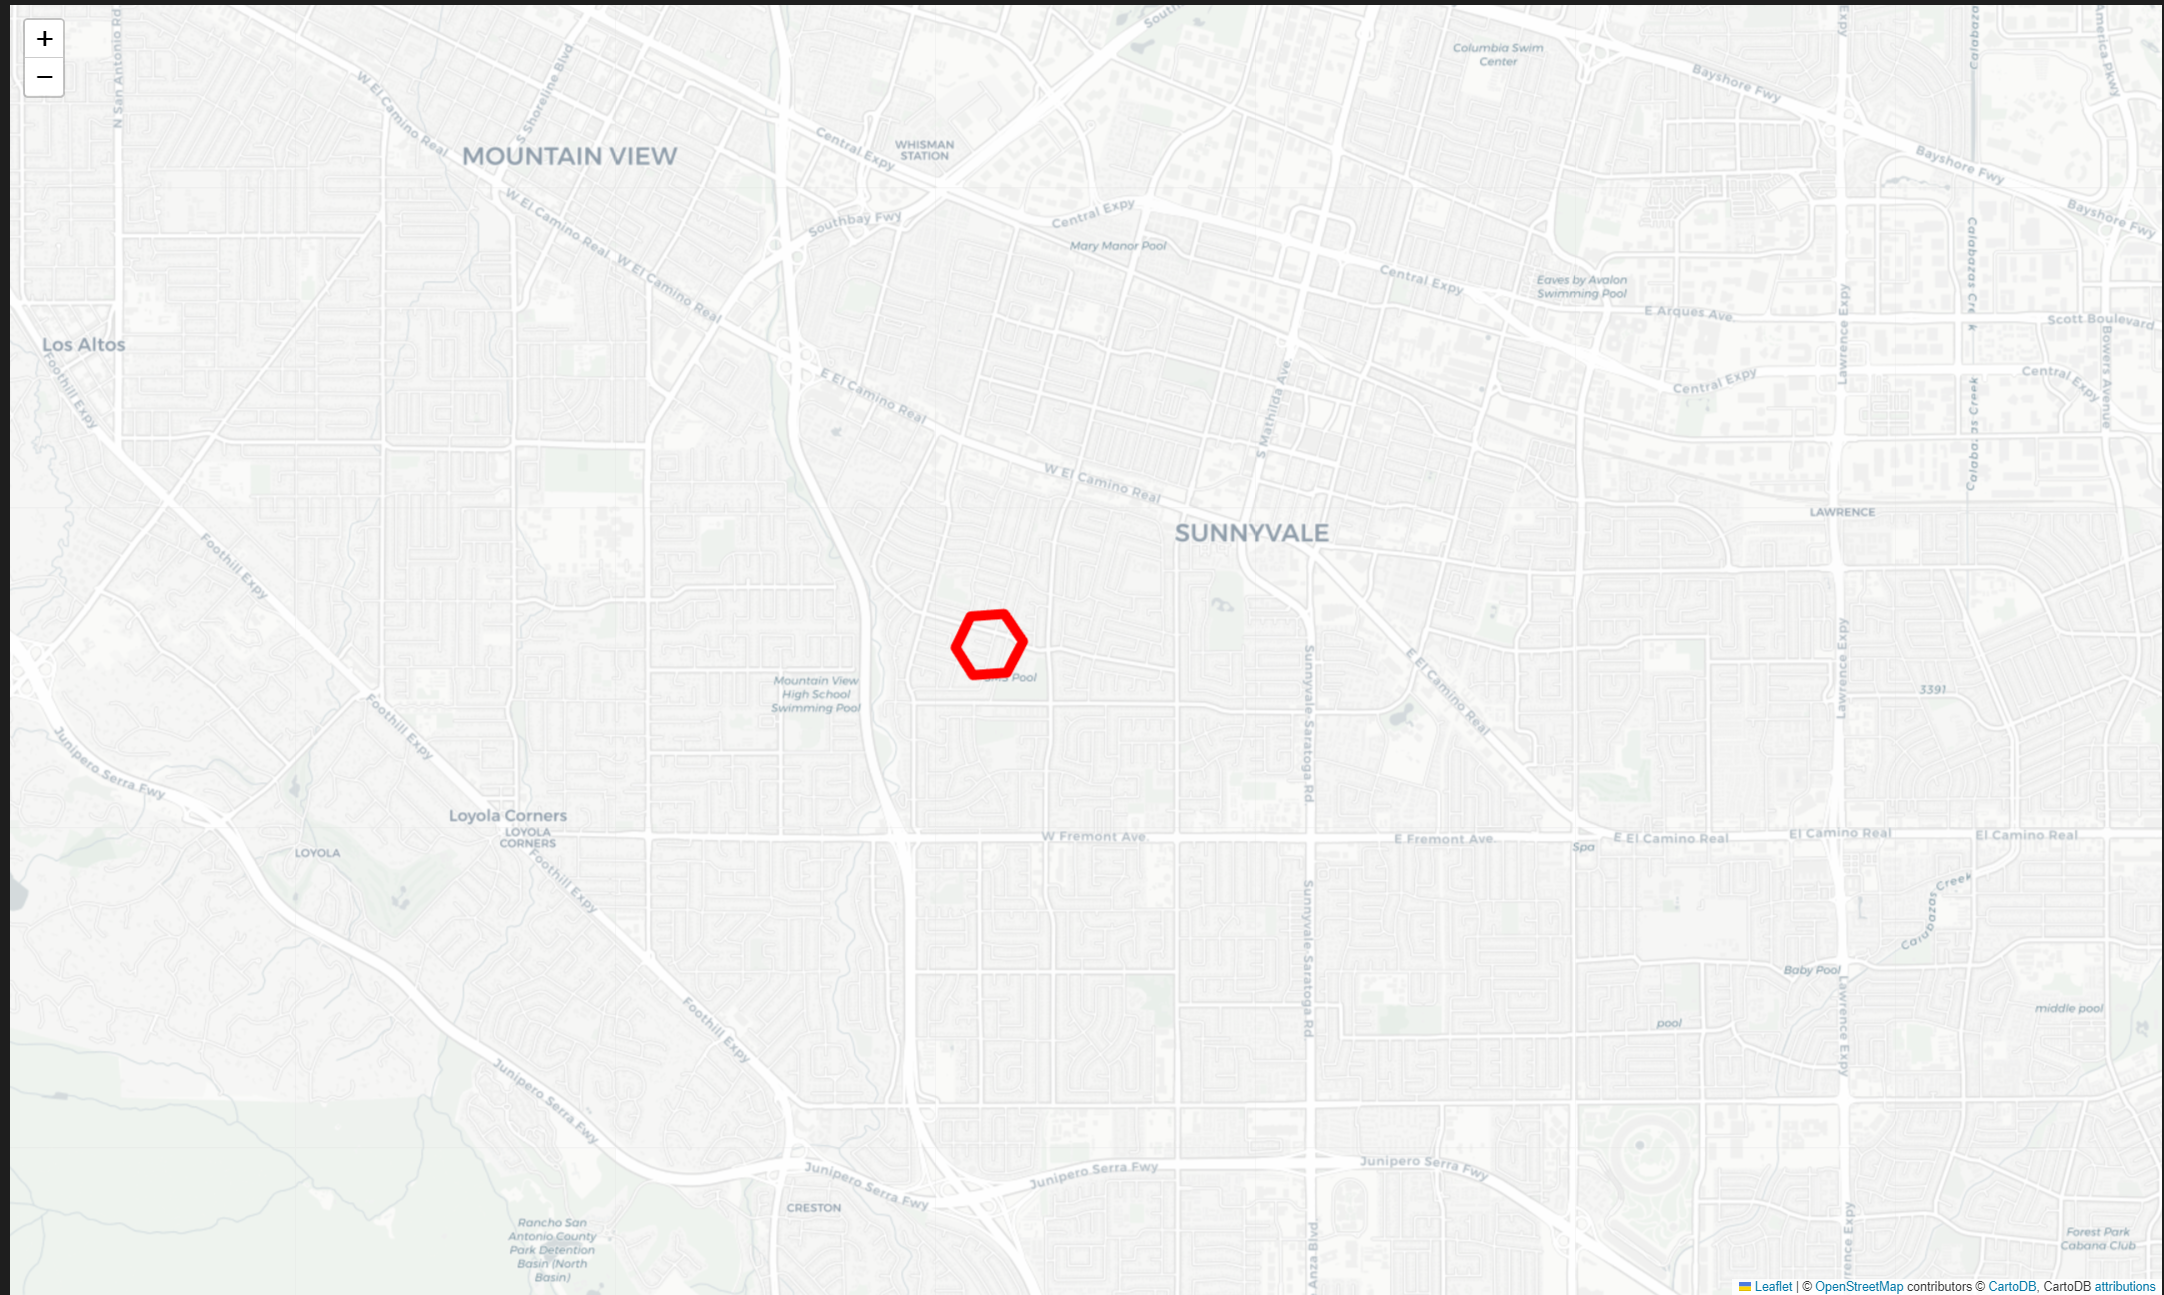

In [4]:
h3_address = h3.geo_to_h3(37.3615593, -122.0553238, 9) # lat, lng, hex resolution                                                                                                        
hex_center_coordinates = h3.h3_to_geo(h3_address) # array of [lat, lng]                                                                                                                  
hex_boundary = h3.h3_to_geo_boundary(h3_address) # array of arrays of [lat, lng]                                                                                                                                                                                                                                                         
m = visualize_hexagons(list(h3.k_ring_distances(h3_address, 4)[3]), color="purple")
m = visualize_hexagons(list(h3.k_ring_distances(h3_address, 4)[2]), color="blue", folium_map=m)
m = visualize_hexagons(list(h3.k_ring_distances(h3_address, 4)[1]), color="green", folium_map=m)
m = visualize_hexagons(list(h3.k_ring_distances(h3_address, 4)[0]), color = "red", folium_map=m)
display(m)

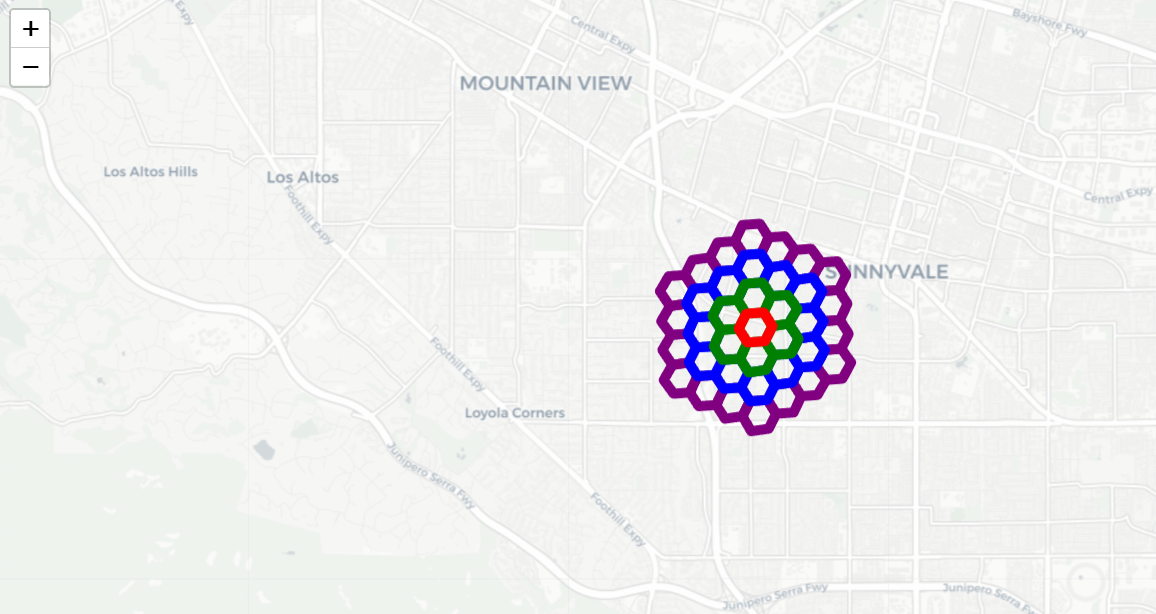

In [5]:
geoJson = {
    'type': 'Polygon',
    'coordinates': [
        [
            [37.813318999983238, -122.4089866999972145],
            [37.7866302000007224, -122.3805436999997056],
            [37.7198061999978478, -122.3544736999993603],
            [37.7076131999975672, -122.5123436999983966],
            [37.7835871999971715, -122.5247187000021967],
            [37.8151571999998453, -122.4798767000009008]
        ]
    ]
}

# 绘制多边形
polyline = geoJson['coordinates'][0]  # 获取多边形的顶点坐标
polyline.append(polyline[0])  # 将第一个点添加到polyline的末尾，以闭合多边形
lat = [p[0] for p in polyline]  # 获取所有顶点的纬度
lng = [p[1] for p in polyline]  # 获取所有顶点的经度
m = folium.Map(location=[sum(lat)/len(lat), sum(lng)/len(lng)], zoom_start=13, tiles='cartodbpositron')  # 创建一个Folium地图对象
my_PolyLine=folium.PolyLine(locations=polyline,weight=8,color="green")  # 创建一个Folium PolyLine对象，表示多边形的轮廓线
m.add_child(my_PolyLine)  # 将PolyLine对象添加到地图上

# 绘制基于H3六边形网格的轮廓线
hexagons = list(h3.polyfill(geoJson, 8))  # 使用h3.polyfill函数根据多边形生成一组H3六边形网格
polylines = []
lat = []
lng = []
for hex in hexagons:  # 对于每个六边形网格
    polygons = h3.h3_set_to_multi_polygon([hex], geo_json=False)  # 将H3索引转换为多边形集
    # 将多边形展平为线段
    outlines = [loop for polygon in polygons for loop in polygon]
    polyline = [outline + [outline[0]] for outline in outlines][0]  # 获取每个多边形的轮廓线
    lat.extend(map(lambda v:v[0],polyline))  # 获取所有顶点的纬度
    lng.extend(map(lambda v:v[1],polyline))  # 获取所有顶点的经度
    polylines.append(polyline)  # 将轮廓线添加到polylines列表
for polyline in polylines:  # 对于每一条轮廓线
    my_PolyLine=folium.PolyLine(locations=polyline,weight=8,color='red')  # 创建一个Folium PolyLine对象，表示六边形网格的轮廓线
    m.add_child(my_PolyLine)  # 将PolyLine对象添加到地图上

display(m)  # 显示地图

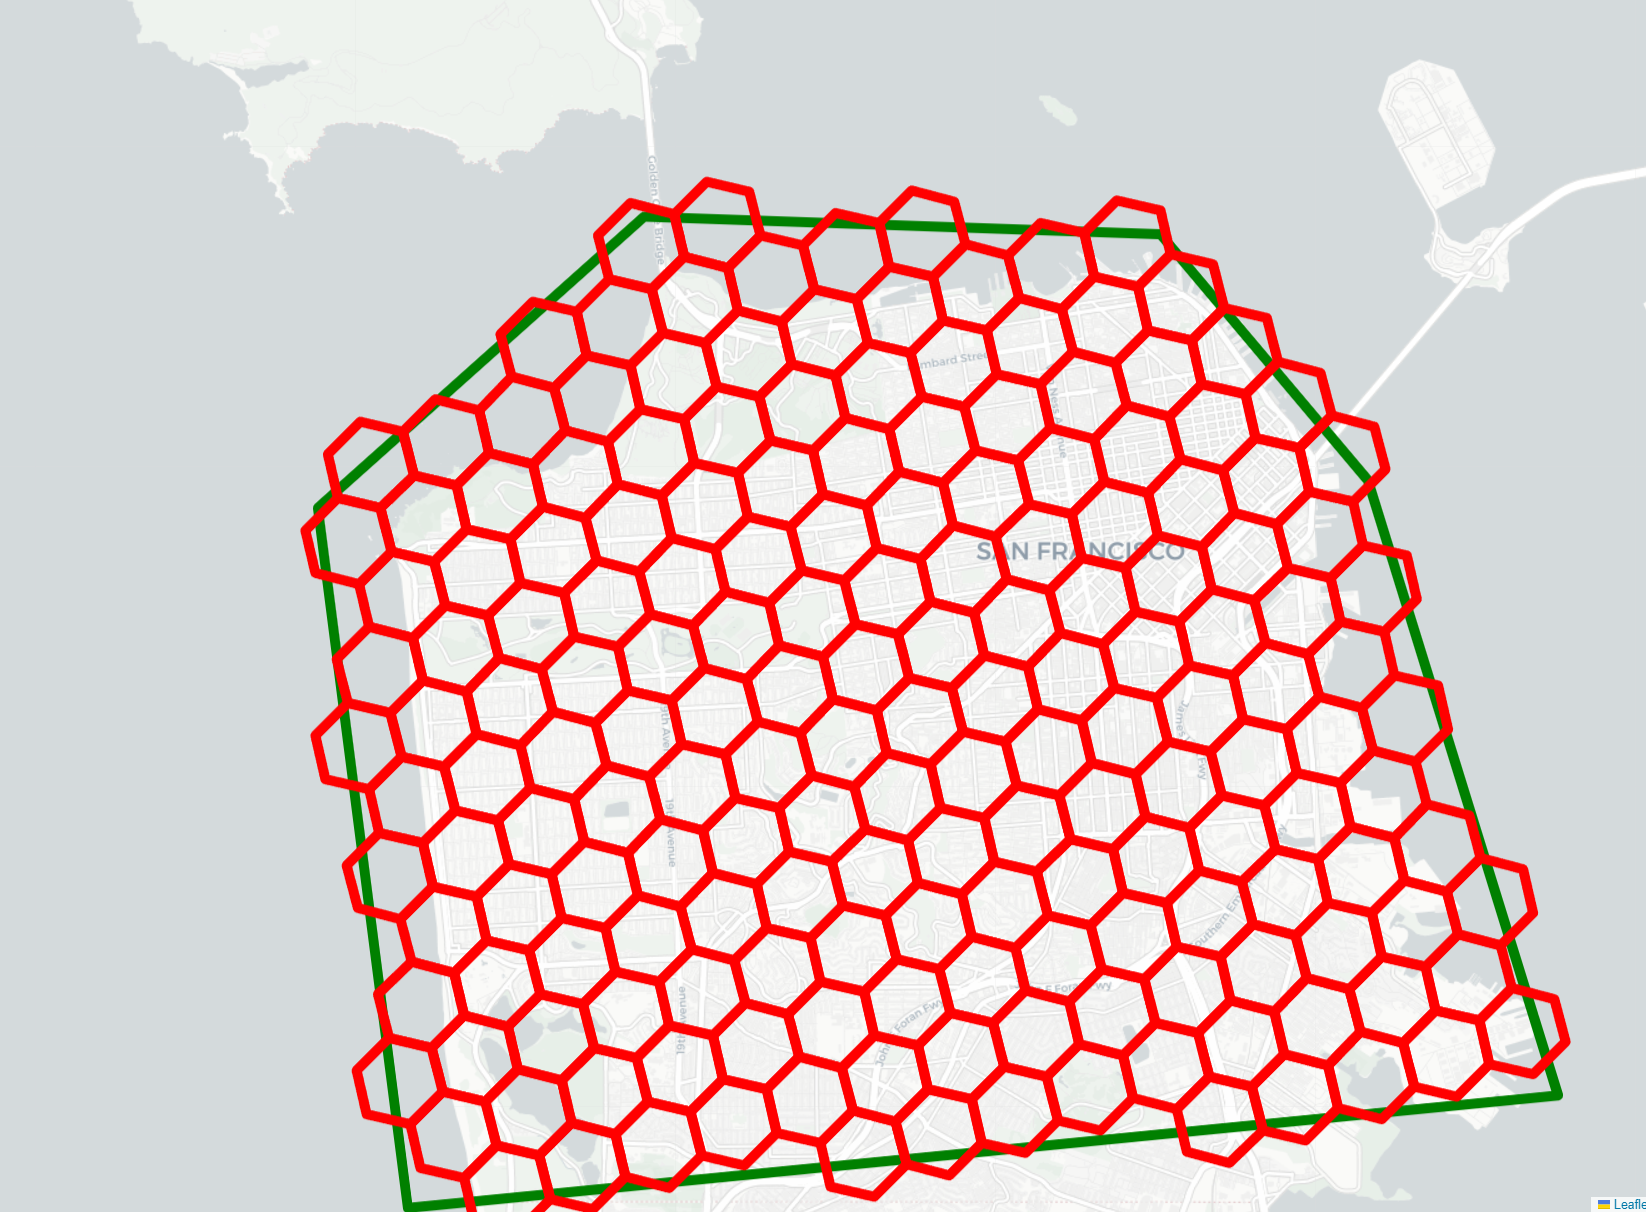